# CUSTOMER ANALYSIS FOR RETAIL

In [88]:
# Import the necceasary packages

# Numerical Operations
import pandas as pd
import numpy as np
import os

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [89]:
#importing the Dataset
customer = pd.read_csv("C:/Users/agraw/Desktop/python retail case studay/Customer.csv")
prod_cat_info = pd.read_csv("C:/Users/agraw/Desktop/python retail case studay/prod_cat_info.csv")
Transactions = pd.read_csv("C:/Users/agraw/Desktop/python retail case studay/Transactions.csv")

In [90]:
inter = pd.merge(Transactions,prod_cat_info,left_on = ['prod_cat_code','prod_subcat_code'],right_on = ['prod_cat_code','prod_sub_cat_code'])
Customer_Final = pd.merge(customer,inter,left_on = 'customer_Id',right_on = 'cust_id')
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,Clothing,1,Women
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
2,268408,02-01-1970,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,Bags,4,Women
3,268408,02-01-1970,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,Footwear,1,Mens
4,268408,02-01-1970,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,Electronics,9,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,3,Kids
23050,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,12,Academic
23051,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,Footwear,1,Mens


### 2. Prepare a summary report for the merged data set.

#### a. Get the column names and their corresponding data types


In [91]:
Customer_Final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [92]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [93]:
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date)
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB)

In [94]:
Customer_Final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

#### b. Top/Bottom 10 observations

In [95]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,63314547725,268408,2012-04-26,1,1,1,806,84.630,890.630,Flagship store,Clothing,1,Women
1,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
2,268408,1970-02-01,M,4.0,12644501524,268408,2012-08-14,4,4,3,321,101.115,1064.115,TeleShop,Bags,4,Women
3,268408,1970-02-01,M,4.0,56844530655,268408,2012-10-14,1,2,5,1175,616.875,6491.875,MBR,Footwear,1,Mens
4,268408,1970-02-01,M,4.0,56902862040,268408,2013-01-30,9,3,5,868,455.700,4795.700,e-Shop,Electronics,9,Cameras
5,268408,1970-02-01,M,4.0,19516063887,268408,2012-07-09,10,3,4,650,273.000,2873.000,e-Shop,Electronics,10,Audio and video
6,268408,1970-02-01,M,4.0,28810141075,268408,2013-02-09,10,6,2,813,170.730,1796.730,TeleShop,Home and kitchen,10,Kitchen
7,268408,1970-02-01,M,4.0,16688203936,268408,2011-12-07,10,6,5,777,407.925,4292.925,Flagship store,Home and kitchen,10,Kitchen
8,268408,1970-02-01,M,4.0,64633435931,268408,2013-06-05,4,2,3,312,98.280,1034.280,Flagship store,Footwear,4,Kids
9,268408,1970-02-01,M,4.0,16197868036,268408,2013-12-16,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens


In [96]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,270476,1992-12-25,F,3.0,85475160771,270476,2011-09-08,5,3,5,1354,710.850,7480.850,Flagship store,Electronics,5,Computers
23044,270476,1992-12-25,F,3.0,78034405353,270476,2013-08-13,11,6,1,971,101.955,1072.955,TeleShop,Home and kitchen,11,Bath
23045,270476,1992-12-25,F,3.0,19725194268,270476,2012-02-21,4,4,4,618,259.560,2731.560,e-Shop,Bags,4,Women
23046,270476,1992-12-25,F,3.0,3359888057,270476,2013-03-16,10,3,4,361,151.620,1595.620,MBR,Electronics,10,Audio and video
23047,270476,1992-12-25,F,3.0,22883386455,270476,2012-05-22,4,2,4,898,377.160,3969.160,Flagship store,Footwear,4,Kids
23048,269626,1992-12-27,F,5.0,71369029396,269626,2011-10-18,12,6,1,638,66.990,704.990,e-Shop,Home and kitchen,12,Tools
23049,269626,1992-12-27,F,5.0,94134051896,269626,2011-07-07,3,1,3,1078,339.570,3573.570,MBR,Clothing,3,Kids
23050,274308,1992-12-29,F,5.0,58160544337,274308,2012-04-07,12,5,5,588,308.700,3248.700,e-Shop,Books,12,Academic
23051,274308,1992-12-29,F,5.0,26208690928,274308,2012-10-22,1,2,2,898,188.580,1984.580,MBR,Footwear,1,Mens
23052,274308,1992-12-29,F,5.0,57358822237,274308,2012-05-09,1,2,4,876,367.920,3871.920,e-Shop,Footwear,1,Mens


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [97]:
Continuous_var_data=Customer_Final[['Qty','Rate','Tax','total_amt']]
Categorical_var_data=Customer_Final[['transaction_id','cust_id','prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_subcat','Gender','city_code']].astype(object)


In [98]:
Continuous_var_data.describe().loc['min':'max',:]

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
25%,1.0,312.0,98.280,762.450
50%,3.0,710.0,199.080,1754.740
75%,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


#### d. Frequency tables for all the categorical variables

In [99]:
Categorical_var_data.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,prod_cat,prod_subcat,Gender,city_code
count,23053,23053,23053,23053,23053,23053,23053,23044,23045.0
unique,20878,5506,12,6,4,6,18,2,10.0
top,32263938079,269449,4,5,e-Shop,Books,Women,M,4.0
freq,4,13,4002,6069,9311,6069,3048,11811,2422.0


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.
#### For Continuous variables:

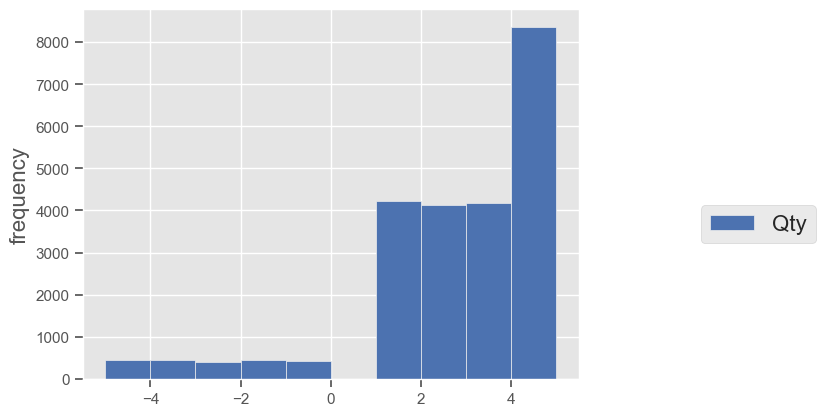

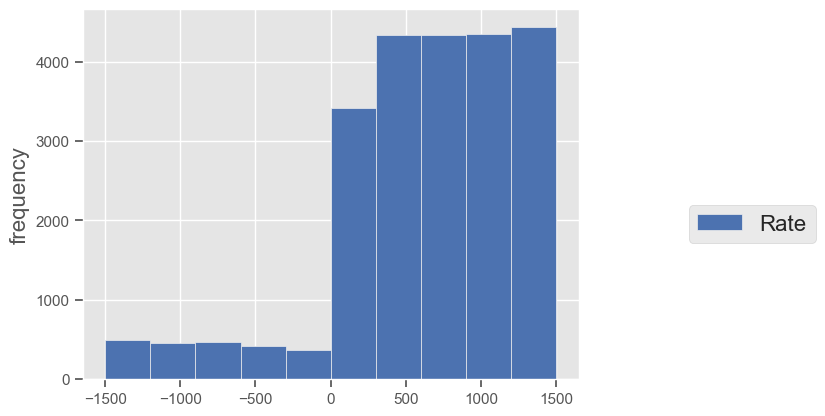

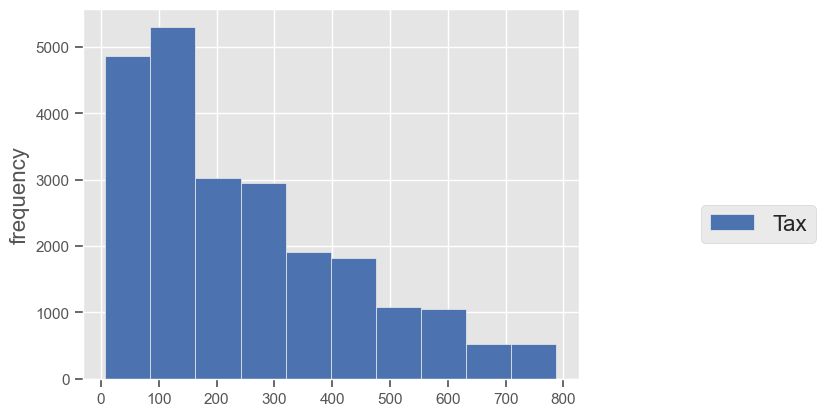

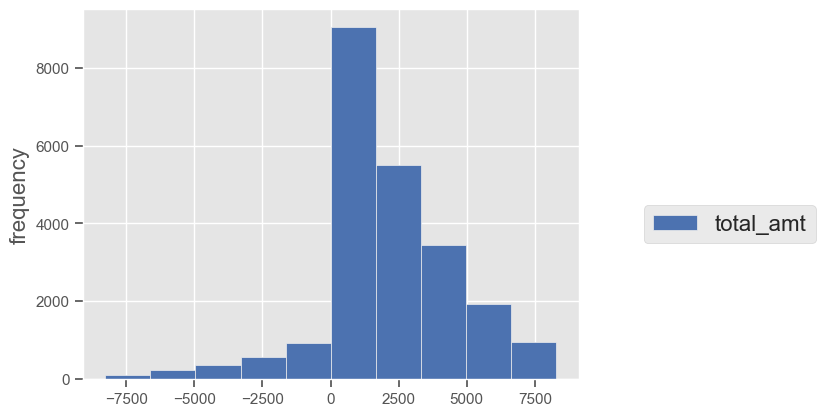

In [100]:
for i in Continuous_var_data.columns:
    plt.hist(Customer_Final[i],label=i,color='b')
    plt.ylabel('frequency',fontsize=16)
    plt.legend(bbox_to_anchor=(1.5,0.5),fontsize=16)
    plt.show()

#### for date variables

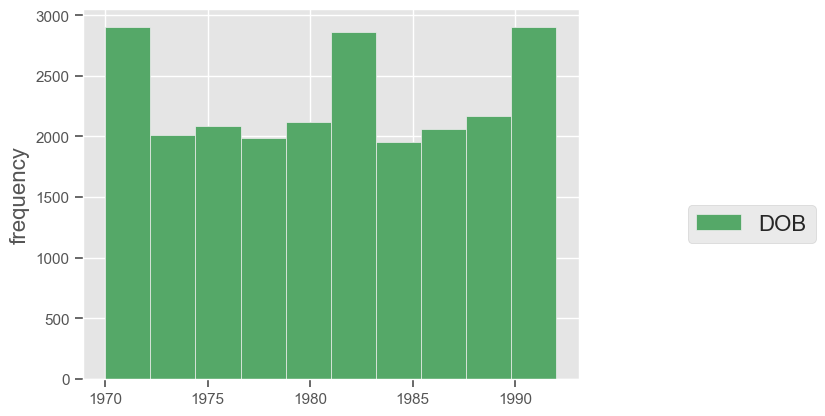

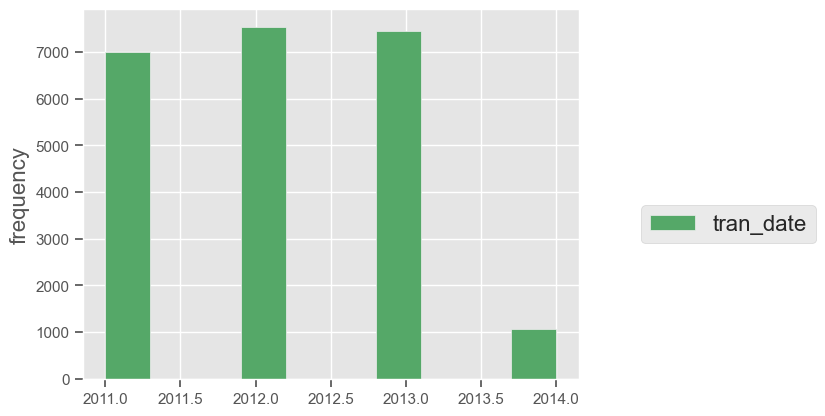

In [101]:
# for date variables, we cannot directly create histograms, we derive some variables and then create histograms
date_col=['DOB','tran_date']
for i in date_col:
    plt.hist(Customer_Final[i].dt.year,label=i,bins=10,color='g')
    plt.ylabel('frequency',fontsize=16)
    plt.legend(bbox_to_anchor=(1.5,0.5),fontsize=16)
    plt.show()

#### for categorical variables:

In [102]:
# since cust_id,tran_id has large number of unique values and they are primary keys , we cannot get a frequency bars
categorical_var=['prod_subcat_code','prod_cat_code','Store_type','prod_cat','prod_subcat','Gender','city_code']

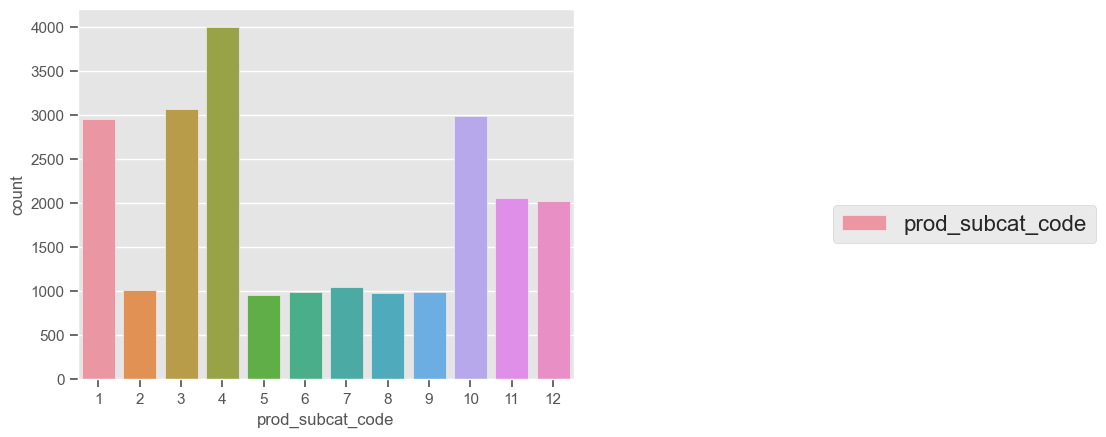

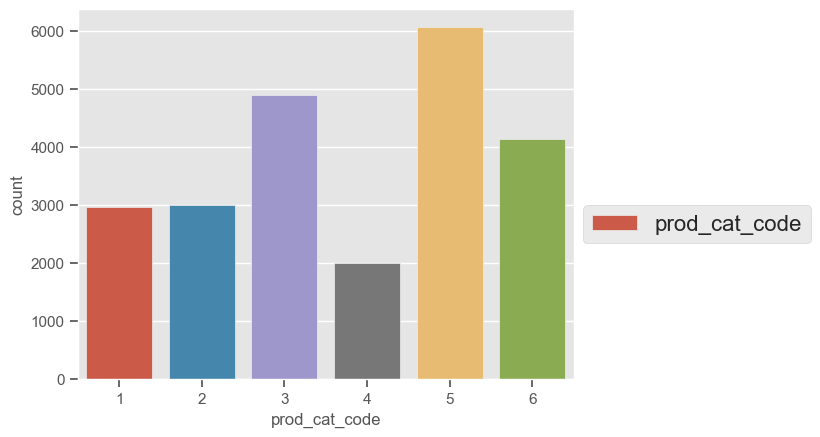

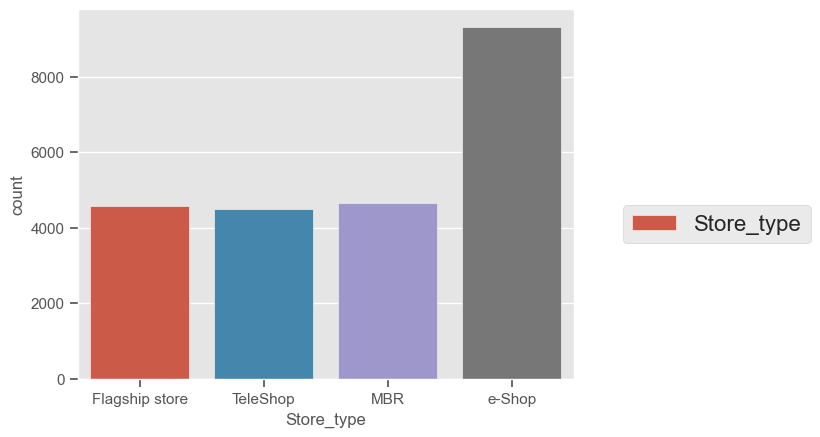

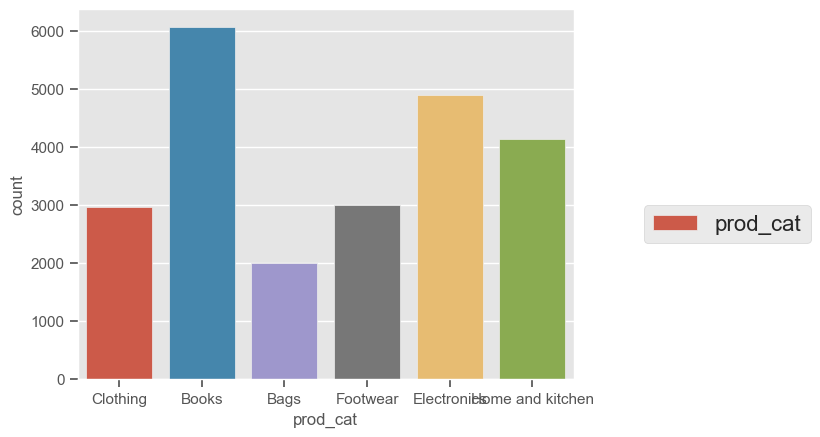

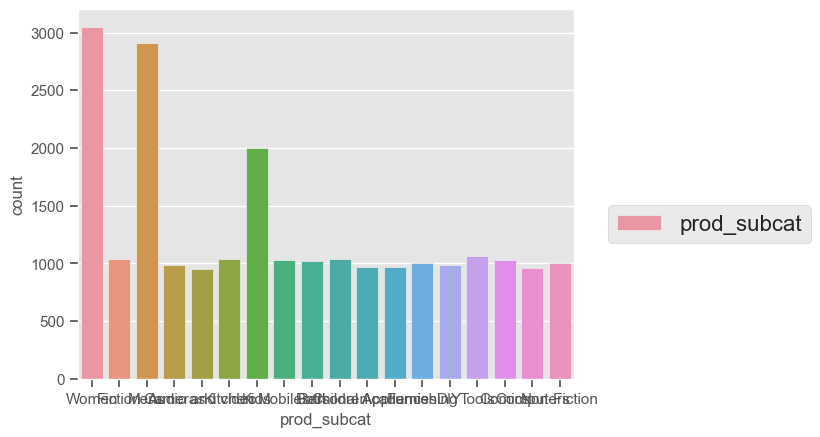

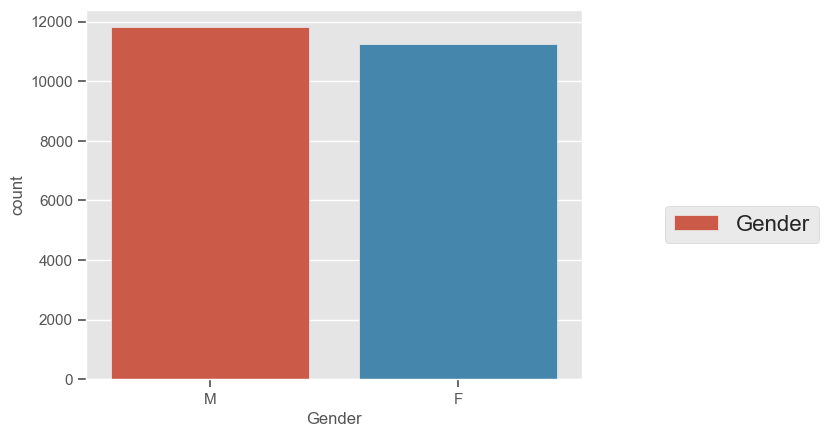

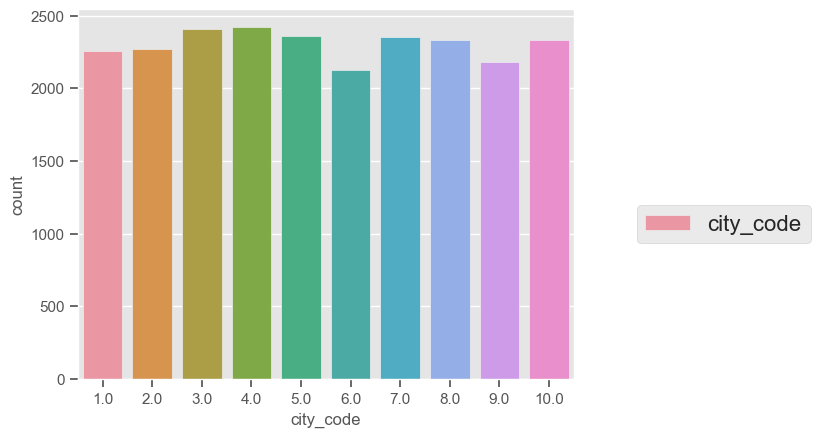

In [103]:
for i in categorical_var:
    sns.countplot(Customer_Final[i],label=i)
    plt.legend(bbox_to_anchor=(1.5,0.5),fontsize=16)
    plt.show()

### 4. Calculate the following information using the merged dataset :


#### a. Time period of the available transaction data

In [104]:
max_date=Customer_Final.tran_date.max()
min_date=Customer_Final.tran_date.min()
a=max_date-min_date
print(f'Time period of the available transaction data is from{min_date} to {max_date} \nThe duration of avaialble transaction data is {a}')

Time period of the available transaction data is from2011-01-02 00:00:00 to 2014-12-02 00:00:00 
The duration of avaialble transaction data is 1430 days 00:00:00


#### b. Count of transactions where the total amount of transaction was negative

In [105]:
Customer_Final[Customer_Final.total_amt <0].transaction_id.count()
print('Count of transactions where the total amount of transaction was negative is',b4)

Count of transactions where the total amount of transaction was negative is 2177


### 5. Analyze which product categories are more popular among females vs male customers.

Footwear,Bags are more popular categories among Females 
Books,Clothing,Electronics,Home and kitchen are more popular categories among Males 
and books is catagory which is popular in both gender


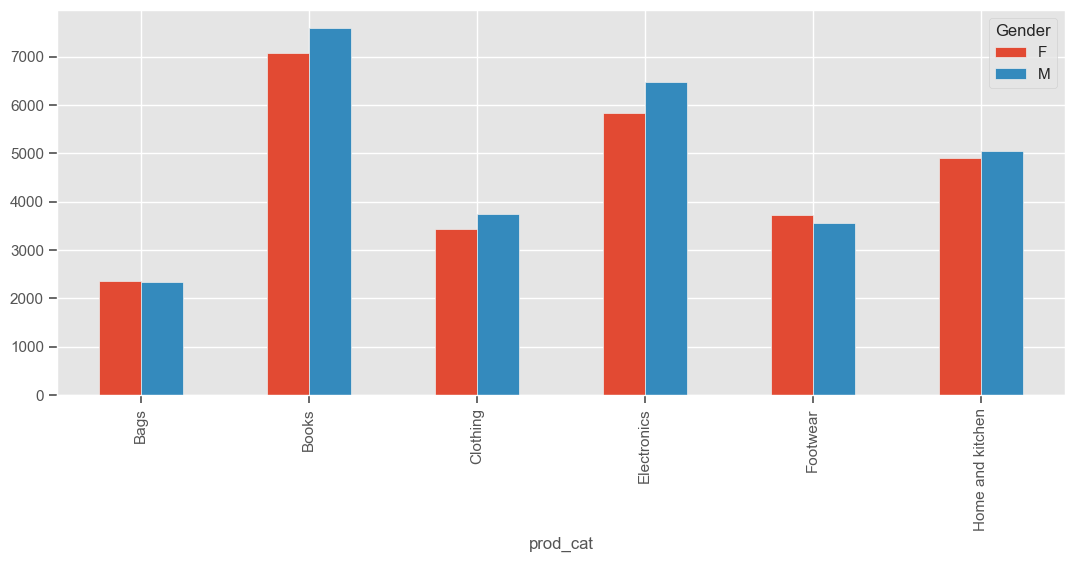

In [106]:
pd.pivot_table(data=Customer_Final,index='prod_cat',columns='Gender',values='Qty',aggfunc='sum').plot.bar(figsize=(13,5))
print('Footwear,Bags are more popular categories among Females \nBooks,Clothing,Electronics,Home and kitchen are more popular categories among Males \nand books is catagory which is popular in both gender')

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [107]:
Q6=(Customer_Final.groupby('city_code')[['cust_id']].count()/(Customer_Final.cust_id.count())*100)
Q6_ans=Q6.sort_values(by='cust_id',ascending=False).head(1)
print(f'City code which has the maximum customers is {Q6_ans.index[0]} with percentage of {Q6_ans.iloc[0,0]}')


City code which has the maximum customers is 4.0 with percentage of 10.506224786361862


### 7.Which store type sells the maximum products by value and by quantity?

In [108]:
Q7=Customer_Final.query('Qty>0').groupby('Store_type')[['total_amt','Qty']].sum()
Q7_ans=Q7.sort_values(by=['total_amt','Qty'],ascending=False).head(1).index[0]
print('store type which sells the maximum products by value and by quantity is :',Q7_ans)

store type which sells the maximum products by value and by quantity is : e-Shop


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [109]:
Q8=Customer_Final.query('Store_type== "Flagship store" and  prod_cat in ["Electronics","Clothing"]')
Q8_ans=Q8.total_amt.sum()
print('the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is : ',Q8_ans)

the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is :  3409559.2699999996


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [110]:
Q9=Customer_Final.query('Gender=="M" and prod_cat == "Electronics"')
Q9_ans=Q9.total_amt.sum()
print('the total amount earned from "Male" customers under the "Electronics" category is : ',Q9_ans)

the total amount earned from "Male" customers under the "Electronics" category is :  5703109.425


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [111]:
Q10=Customer_Final.query('total_amt>0').groupby('cust_id')[['transaction_id']].count()
Q10_ans=Q10.query('transaction_id >= 10').count().iloc[0]
print('Number of  customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is : ',Q10_ans)

Number of  customers have more than 10 unique transactions, after removing all transactions which have any negative amounts is :  27


### 11. For all customers aged between 25 - 35, find out:


#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [112]:
Customer_Final['age']=Customer_Final.tran_date.dt.year - Customer_Final.DOB.dt.year
Q11=Customer_Final.query('age>= 25 and age<=35')

In [113]:
Q11_a_ans=Q11.query('prod_cat in ["Electronics","Books"]').total_amt.sum()
print('the total amount spent for “Electronics” and “Books” product categories is :',Q11_a_ans)

the total amount spent for “Electronics” and “Books” product categories is : 11219541.254999999


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [114]:
Q11_b_ans=Q11.query('tran_date >= "2014-01-01" and tran_date <= "2014-03-01"').total_amt.sum()
print('the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is',Q11_b_ans)

the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 685698.9099999999
